# Predicting Forest Fires


In this notebook I will explore different machine learning regression algorithms to see how well they can predict forest fire outcomes. In this notebook I will examine the different merits and drawbacks of using multiple linear regression, polynomial regression, SVM regression, and random forest regression.


All X features are scaled and y has been transformed.

# Model

I will perform a series of operations on this dataset to understand the different pros and cons of each type of regression algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data from flat file

# Set path
path = 'forestfires.csv'
data = pd.read_csv(path)
data.head()

X_train = pd.read_csv('ForestFires_XTrain.txt').values
X_test = pd.read_csv('ForestFires_XTest.txt').values
y_train = pd.read_csv('ForestFires_yTrain.txt').values
y_test = pd.read_csv('ForestFires_yTest.txt').values

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

## Multiple Linear Regression with Backwards Elimination

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.formula.api as sm

In [4]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=19, step=1, )
selector = selector.fit(X_train, y_train)

opt = selector.get_support()

OLS = sm.OLS(y_train, X_train[:, opt]).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     12.64
Date:                Wed, 06 Mar 2019   Prob (F-statistic):           1.76e-30
Time:                        13:11:00   Log-Likelihood:                -710.22
No. Observations:                 413   AIC:                             1458.
Df Residuals:                     394   BIC:                             1535.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1071      0.069      1.553      0.121      -0.029       0.243
x2             0.0439      0.109      0.402      0.688      -0.171       0.259
x3             0.5190      0.147      3.538      0.000       0.231       0.807
x4             0.0344      0.095      0.363      0.717      -0.152       0.220
x5            -0.3236      0.199     -1.626      0.105      -0.715       0.068
x6             0.1553      0.170      0.911      0.363      -0.180       0.490
x7             2.7384      0.627      4.368      0.000       1.506       3.971
x8             1.4396      0.462      3.113      0.002       0.530       2.349
x9             0.5924      1.452      0.408      0.683      -2.261       3.446
x10            0.4295      0.311      1.382      0.168      -0.181       1.040
x11            0.7341      0.511      1.436      0.152      -0.271       1.739
x12            1.3972      0.354      3.952      0.000       0.702       2.092
x13            4.7402      1.406      3.373      0.001       1.977       7.503
x14            0.2418      1.429      0.169      0.866      -2.568       3.051
x15            0.7897      0.203      3.898      0.000       0.391       1.188
x16            0.8057      0.187      4.319      0.000       0.439       1.172
x17            0.7118      0.222      3.208      0.001       0.276       1.148
x18            0.7129      0.219      3.255      0.001       0.282       1.144
x19            0.8200      0.237      3.460      0.001       0.354       1.286
==============================================================================
Omnibus:                       59.216   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.912
Skew:                           1.045   Prob(JB):                     2.69e-18
Kurtosis:                       3.580   Cond. No.                         33.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the OLS regression formula the maximum Adjusted R-Squared value is reached when there are 19 features included in the regression equation. I'll need to look into how Adjusted R-Squared can reach its maximum with so many inputs considering several (9) have p>0.05 which is a pretty standard measure of significance.

In [ ]:
pd.get_dummies(data.iloc[:, :-1], drop_first=True).columns[opt]

Index(['X', 'DMC', 'DC', 'temp', 'rain', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'day_sat', 'day_sun', 'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

The above columns are the ones selected by the model as regressors. This list of regressors appears nonsensical to me. It would some compelling support for me to be convinced that these atrributes are truly the most significant.

## Mulitple Linear Regression with Recursive Feature Elimination with Cross Validation

Performs the same Backwards Elimination, but has the added complexity of incorporating cross validation. Cross Validation is the process of splitting the training data into smaller subsets. The model finds parameters for each of the subsets.

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score

In [ ]:
estimator = LinearRegression()
selector = RFECV(estimator, min_features_to_select=1, cv=3, step=1, scoring='r2')
selector = selector.fit(X_train, y_train)

opt = selector.get_support()

OLS = sm.OLS(y_train, X_train[:, opt]).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     9.522
Date:                Wed, 06 Mar 2019   Prob (F-statistic):           9.07e-05
Time:                        13:11:00   Log-Likelihood:                -799.14
No. Observations:                 413   AIC:                             1602.
Df Residuals:                     411   BIC:                             1610.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.5885      0.686      3.775      0.000       1.241       3.936
x2             3.6758      1.679      2.189      0.029       0.374       6.977
==============================================================================
Omnibus:                       79.878   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.027
Skew:                           1.247   Prob(JB):                     1.93e-27
Kurtosis:                       3.966   Cond. No.                         2.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pd.get_dummies(data.iloc[:, :-1], drop_first=True).columns[opt]

Index(['month_dec', 'month_may'], dtype='object')

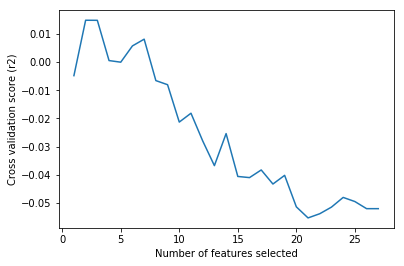

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

Model is garbage. Predicts slightly better than random at its best.

## Multiple Linear Regression with F_Regression

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
estimator = LinearRegression()
selector = SelectKBest(f_regression)
selector.fit(X_train, y_train)

opt = selector.get_support()

OLS = sm.OLS(y_train, X_train[:, opt]).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     16.51
Date:                Wed, 06 Mar 2019   Prob (F-statistic):           4.87e-25
Time:                        13:11:00   Log-Likelihood:                -737.59
No. Observations:                 413   AIC:                             1495.
Df Residuals:                     403   BIC:                             1535.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1416      0.072      1.957      0.051      -0.001       0.284
x2             0.5628      0.111      5.073      0.000       0.345       0.781
x3            -0.5042      0.157     -3.203      0.001      -0.814      -0.195
x4            -0.0940      0.077     -1.216      0.225      -0.246       0.058
x5             0.0849      0.079      1.069      0.285      -0.071       0.241
x6            -0.2706      0.214     -1.262      0.208      -0.692       0.151
x7             2.7340      0.624      4.382      0.000       1.507       3.961
x8             0.4107      0.320      1.284      0.200      -0.218       1.040
x9             3.4600      1.479      2.339      0.020       0.552       6.368
x10            1.5411      0.167      9.205      0.000       1.212       1.870
==============================================================================
Omnibus:                       46.356   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.784
Skew:                           0.880   Prob(JB):                     1.72e-13
Kurtosis:                       3.562   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pd.get_dummies(data.iloc[:, :-1], drop_first=True).columns[opt]

Index(['X', 'DMC', 'DC', 'RH', 'wind', 'rain', 'month_dec', 'month_mar',
       'month_may', 'month_sep'],
      dtype='object')

# Visualize

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Plot Training data
plt.scatter(X_train, y_train, color='red')
sns.regplot(X_train, regressor.predict(X_train), color='blue')
plt.title('Training Parameters')
plt.show()

In [ ]:
# Plot Test data
plt.scatter(X_test, y_test, color='red')
sns.regplot(X_test, regressor.predict(X_test), color='blue')
plt.title('Test Parameters')
plt.show()